In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt



In [19]:
data = pd.read_csv('Super_Store_data.csv',encoding='latin1')

# Displaying the first few rows of the dataset
data.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [20]:
# Converting the 'Order Date' column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Setting 'Order Date' as the index
data.set_index('Order Date', inplace=True)

# Resampling the data to monthly frequency and summing the sales
monthly_sales = data['Sales'].resample('M').sum()


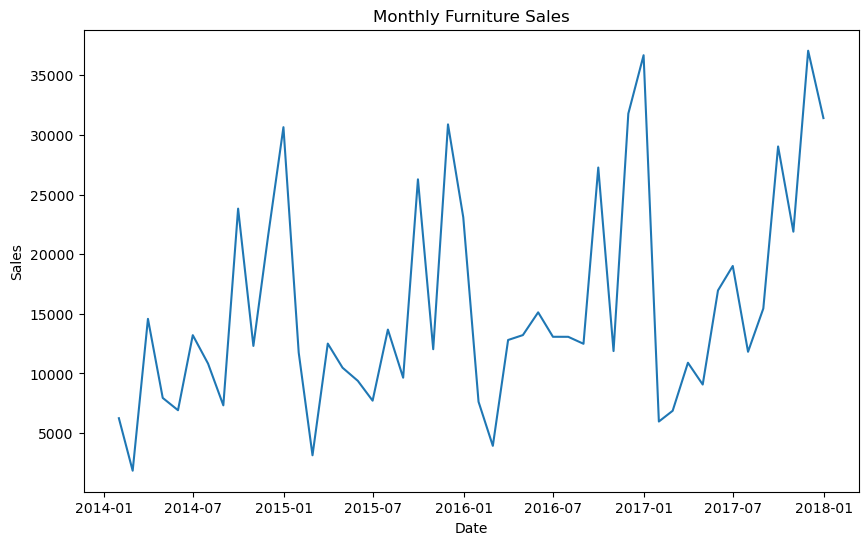

In [21]:
# Visualizing the time series data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales)
plt.title('Monthly Furniture Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [22]:
# Decomposing the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(monthly_sales, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


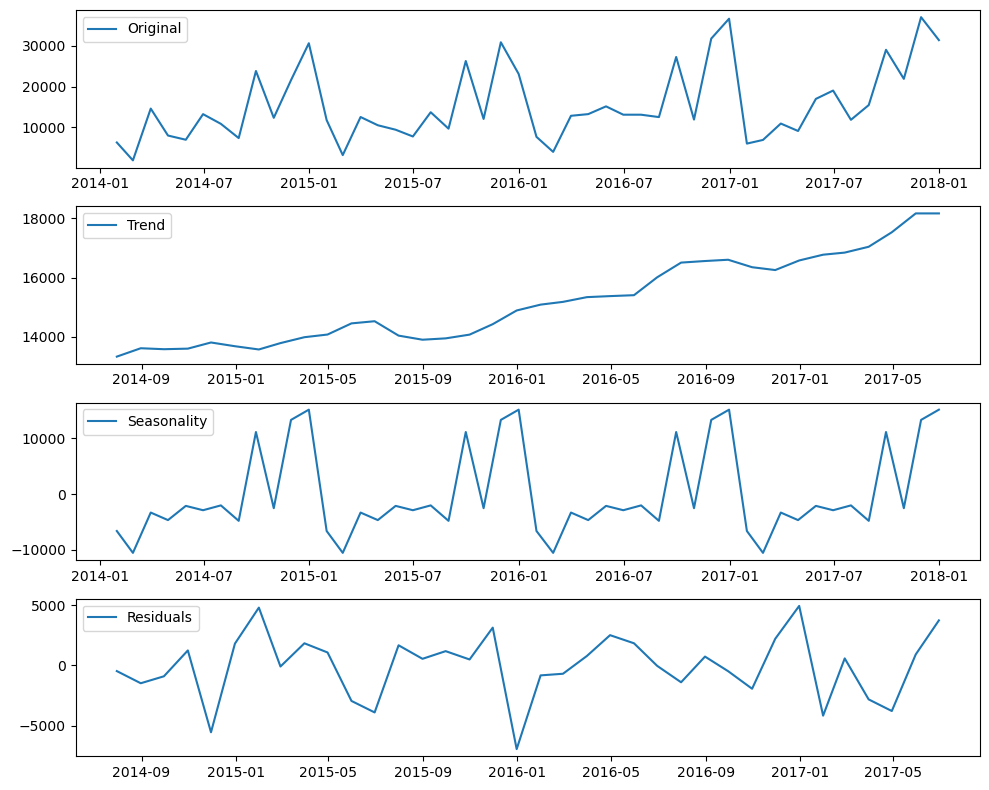

In [23]:
# Visualizing the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(monthly_sales, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [24]:
# Step 3: Forecasting Techniques
# Splitting the data into training and testing sets
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[0:train_size], monthly_sales[train_size:len(monthly_sales)]


In [25]:
# ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   38
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -389.499
Date:                Thu, 18 Apr 2024   AIC                            790.998
Time:                        21:19:07   BIC                            800.664
Sample:                    01-31-2014   HQIC                           794.406
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5997      0.244     -2.455      0.014      -1.079      -0.121
ar.L2         -0.4841      0.293     -1.653      0.098      -1.058       0.090
ar.L3         -0.2184      0.315     -0.692      0.489      -0.837       0.400
ar.L4         -0.2718      0.394     -0.690      0.490      -1.043       0.500
ar.L5         -0.3314      0.247     -1.340      0.180      -0.816       0.153
sigma2        8.6e+07   1.14e-09   7.56e+16      0.000     8.6e+07     8.6e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.95   Prob(JB):                         0.64
Heteroskedasticity (H):               1.81   Skew:                             0.20
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.24e+33. Standard errors may be unstable.
"""

Test RMSE: 9720.343


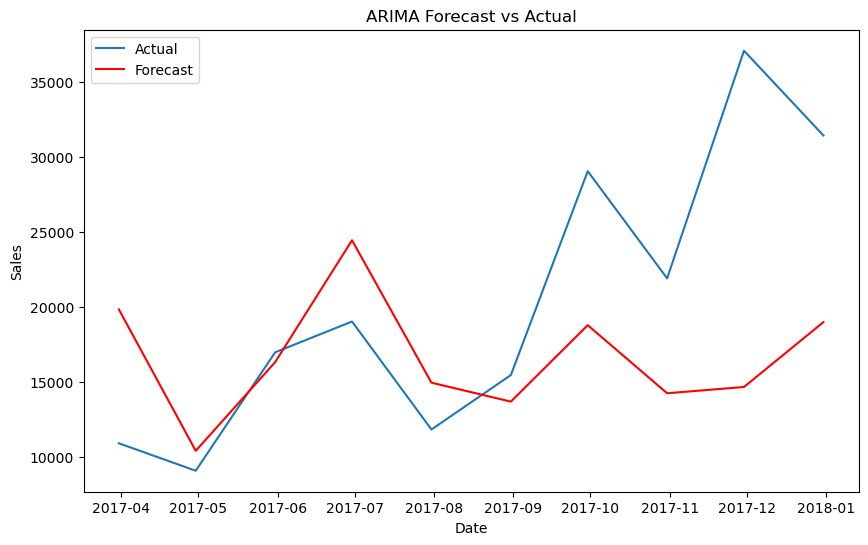

In [33]:
# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Calculating RMSE
rmse = sqrt(mean_squared_error(test, forecast))
print('Test RMSE: %.3f' % rmse)

# Visualizing the forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, color='red', label='Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [46]:
forecast.head()

2017-03-31    19814.649109
2017-04-30    10392.079732
2017-05-31    16302.508919
2017-06-30    24425.331038
2017-07-31    14932.781229
Freq: M, Name: predicted_mean, dtype: float64

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, forecast)
print('Mean Absolute Error (MAE): %.3f' % mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test, forecast)
print('Mean Squared Error (MSE): %.3f' % mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print('Root Mean Squared Error (RMSE): %.3f' % rmse)


Mean Absolute Error (MAE): 7397.620
Mean Squared Error (MSE): 94485058.362
Root Mean Squared Error (RMSE): 9720.343


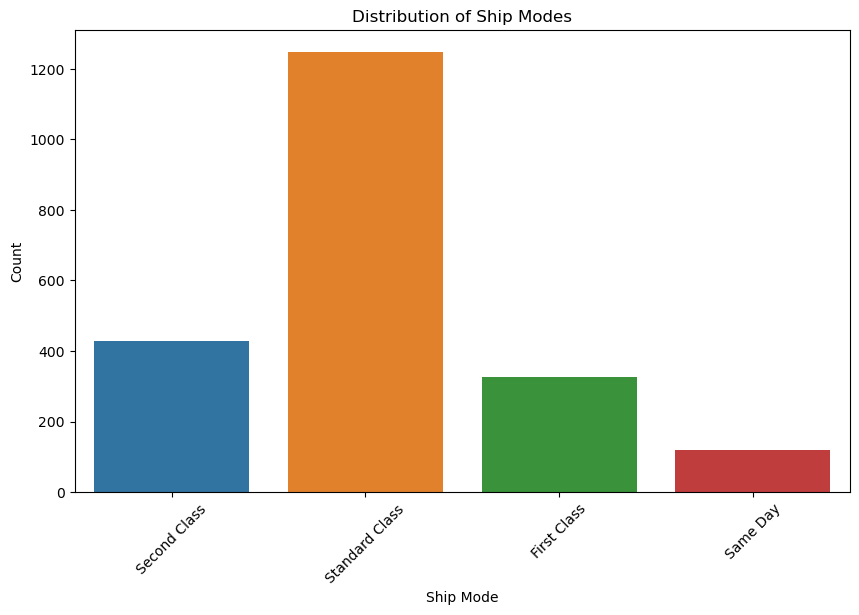

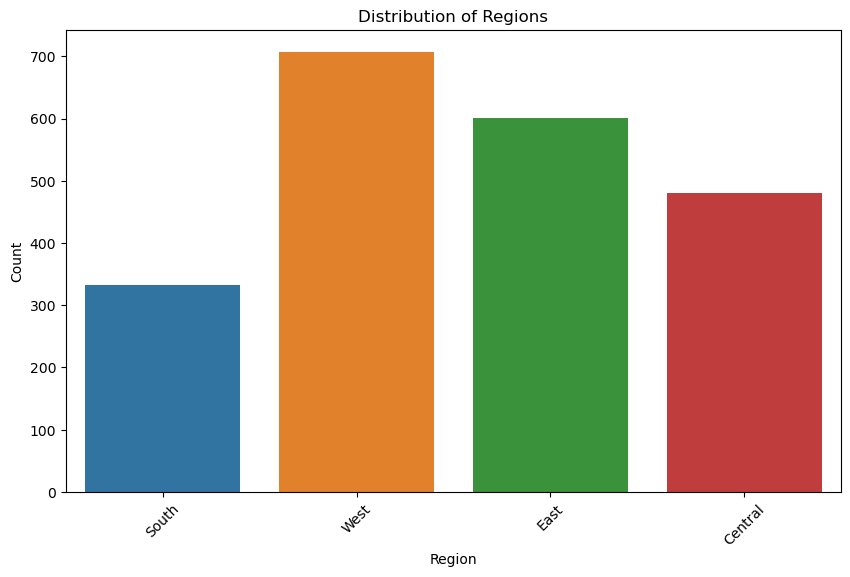

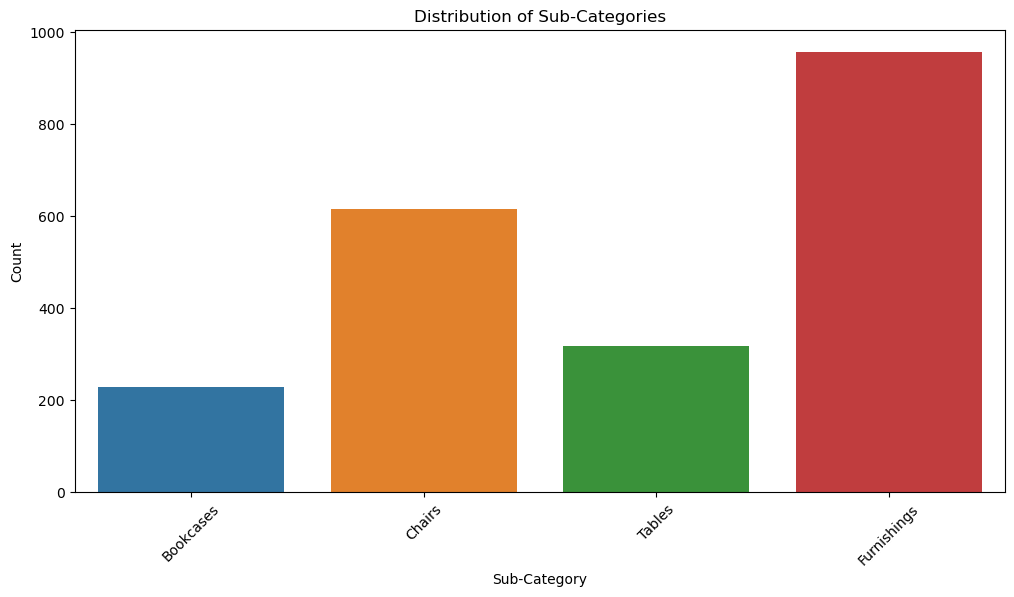

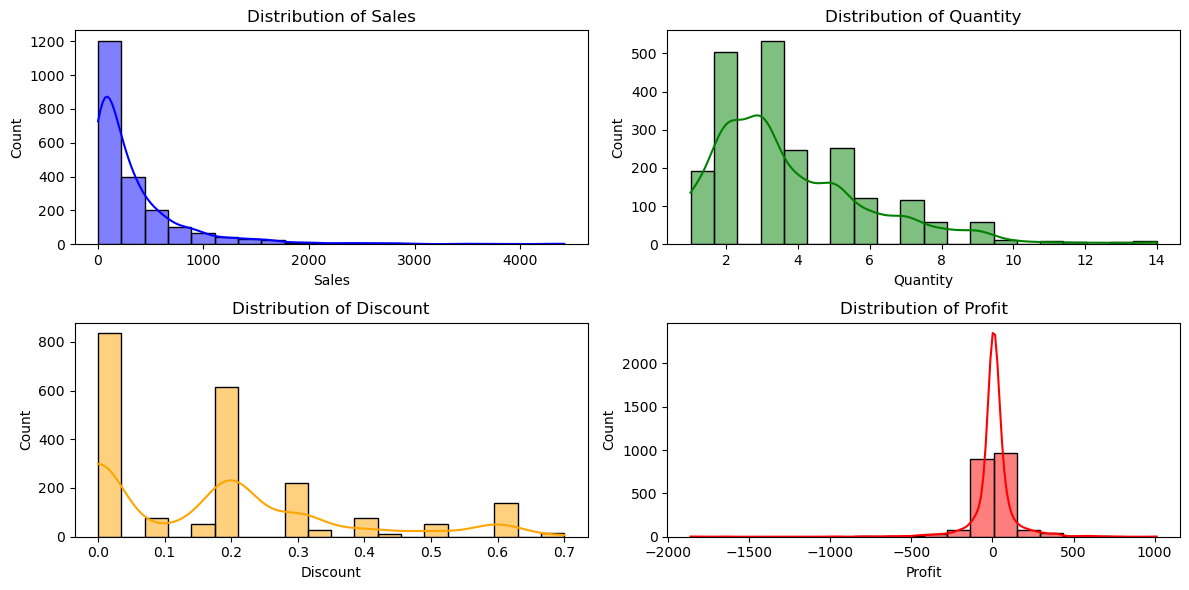

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Ship Mode
plt.figure(figsize=(10, 6))
sns.countplot(x='Ship Mode', data=data)
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualizing Region
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=data)
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualizing Sub-Category
plt.figure(figsize=(12, 6))
sns.countplot(x='Sub-Category', data=data)
plt.title('Distribution of Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualizing Sales, Quantity, Discount, and Profit
plt.figure(figsize=(12, 6))

# Sales
plt.subplot(2, 2, 1)
sns.histplot(data['Sales'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sales')

# Quantity
plt.subplot(2, 2, 2)
sns.histplot(data['Quantity'], bins=20, kde=True, color='green')
plt.title('Distribution of Quantity')

# Discount
plt.subplot(2, 2, 3)
sns.histplot(data['Discount'], bins=20, kde=True, color='orange')
plt.title('Distribution of Discount')

# Profit
plt.subplot(2, 2, 4)
sns.histplot(data['Profit'], bins=20, kde=True, color='red')
plt.title('Distribution of Profit')

plt.tight_layout()
plt.show()


In [38]:
# Grouping by Ship Mode and calculating the total sales and profit for each mode
ship_mode_groups = df.groupby('Ship Mode').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Grouping by Region and calculating the average discount applied
region_discount = df.groupby('Region')['Discount'].mean().reset_index()

# Grouping by Sub-Category and calculating the total sales for each category
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()

# Grouping by Quantity and calculating the total sales for each quantity level
quantity_sales = df.groupby('Quantity')['Sales'].sum().reset_index()

# Grouping by Discount and calculating the total sales for each discount level
discount_sales = df.groupby('Discount')['Sales'].sum().reset_index()


In [40]:
ship_mode_groups

,Ship Mode,Sales,Profit
0,First Class,110730.5229,3066.9474
1,Same Day,39148.7790,797.3484
2,Second Class,156289.0244,4226.2614
3,Standard Class,435831.4690,10360.7156


In [41]:
region_discount

,Region,Discount
0,Central,0.297380
1,East,0.154077
2,South,0.121536
3,West,0.131400


In [42]:
subcategory_sales

,Sub-Category,Sales
0,Bookcases,114879.9963
1,Chairs,328449.1030
2,Furnishings,91705.1640
3,Tables,206965.5320


In [43]:
quantity_sales

,Quantity,Sales
0,1,18491.2395
1,2,87642.4898
2,3,137952.1827
3,4,85080.7304
4,5,127640.4515
5,6,73934.1894
6,7,69861.8179
7,8,43689.6080
8,9,55254.8061
9,10,13437.6740


In [44]:
discount_sales

,Discount,Sales
0,0.00,256025.2700
1,0.10,46634.2470
2,0.15,27558.5215
3,0.20,216631.0160
4,0.30,99470.3500
5,0.32,14493.4588
6,0.40,45614.4060
7,0.45,5484.9740
8,0.50,20983.4700
9,0.60,6644.7000
